In [10]:
# Importamos las librerías que vamos a utilizar
import numpy as np           # para hacer operaciones matemáticas
import pandas as pd          # para manejo de archivos de datos
import matplotlib.pyplot as plt  # para hacer gráficos
import seaborn as sns        # para hacer gráficos

### Ejercicio 1 
Una startup instala paneles solares en tres barrios (A, B y C) durante 6 meses. Vamos a analizar la información de producción y costos. 

**A. Simulación y armado del DataFrame**

**a.** Generar con NumPy dos arrays 6x3 (6 meses y 3 barrios):

   - **i.** `energia` = energía producida (en MWh)
   - **ii.** `costo_unitario` = costo por MWh

**b.** Armar un DataFrame con columnas: 
   - `mes`, `A`, `B`, `C` (para energía) 
   - `costo_A`, `costo_B`, `costo_C`

**c.** Agregar columna de costo total mensual y fila de costo total por barrio


In [11]:
# a. Generar con NumPy dos arrays 6x3 (6 meses y 3 barrios)

# i. Array de energía producida (en MWh) - 6 meses × 3 barrios
# Simulamos datos realistas de producción de energía solar
energia = np.array([
    [45.2, 52.8, 38.5],  # Mes 1: Barrio A, B, C
    [48.7, 55.3, 42.1],  # Mes 2
    [52.4, 58.9, 45.6],  # Mes 3
    [49.1, 56.2, 41.8],  # Mes 4
    [46.8, 53.7, 39.9],  # Mes 5
    [44.3, 51.4, 37.2]   # Mes 6
])

# ii. Array de costo unitario por MWh - 6 meses × 3 barrios
# Simulamos costos de mantenimiento y operación por MWh
costo_unitario = np.array([
    [15.5, 14.8, 16.2],  # Mes 1: Costo por MWh en Barrio A, B, C
    [15.7, 15.0, 16.5],  # Mes 2
    [15.3, 14.6, 16.0],  # Mes 3
    [15.9, 15.2, 16.7],  # Mes 4
    [15.4, 14.9, 16.1],  # Mes 5
    [15.6, 15.1, 16.4]   # Mes 6
])

print("Array de energía producida (MWh):")
print("Filas = meses, Columnas = barrios A, B, C")
print(energia)
print(f"Dimensiones: {energia.shape}")

print("\nArray de costo unitario ($/MWh):")
print("Filas = meses, Columnas = barrios A, B, C")
print(costo_unitario)
print(f"Dimensiones: {costo_unitario.shape}")

Array de energía producida (MWh):
Filas = meses, Columnas = barrios A, B, C
[[45.2 52.8 38.5]
 [48.7 55.3 42.1]
 [52.4 58.9 45.6]
 [49.1 56.2 41.8]
 [46.8 53.7 39.9]
 [44.3 51.4 37.2]]
Dimensiones: (6, 3)

Array de costo unitario ($/MWh):
Filas = meses, Columnas = barrios A, B, C
[[15.5 14.8 16.2]
 [15.7 15.  16.5]
 [15.3 14.6 16. ]
 [15.9 15.2 16.7]
 [15.4 14.9 16.1]
 [15.6 15.1 16.4]]
Dimensiones: (6, 3)


In [12]:
# b. Armar un DataFrame con columnas: mes, A, B, C (para energía) y costo_A, costo_B y costo_C

# Creamos primero el vector de meses
meses = np.arange(1, 7)  # Meses del 1 al 6

# Armamos el DataFrame combinando energía y costos
# Estructura: [mes, energía_A, energía_B, energía_C, costo_A, costo_B, costo_C]
df_energia_costos = pd.DataFrame({
    'mes': meses,
    'A': energia[:, 0],           # Energía producida en barrio A
    'B': energia[:, 1],           # Energía producida en barrio B  
    'C': energia[:, 2],           # Energía producida en barrio C
    'costo_A': costo_unitario[:, 0],  # Costo unitario en barrio A
    'costo_B': costo_unitario[:, 1],  # Costo unitario en barrio B
    'costo_C': costo_unitario[:, 2]   # Costo unitario en barrio C
})

print("DataFrame de energía y costos por barrio:")
print(df_energia_costos)

DataFrame de energía y costos por barrio:
   mes     A     B     C  costo_A  costo_B  costo_C
0    1  45.2  52.8  38.5     15.5     14.8     16.2
1    2  48.7  55.3  42.1     15.7     15.0     16.5
2    3  52.4  58.9  45.6     15.3     14.6     16.0
3    4  49.1  56.2  41.8     15.9     15.2     16.7
4    5  46.8  53.7  39.9     15.4     14.9     16.1
5    6  44.3  51.4  37.2     15.6     15.1     16.4


In [13]:
# c. Agregar columna de costo total mensual y fila de costo total por barrio

# Paso 1: Calculamos el costo total mensual
# Costo total = (energía × costo_unitario) para cada barrio, sumado por mes
df_energia_costos['costo_total_A'] = df_energia_costos['A'] * df_energia_costos['costo_A']
df_energia_costos['costo_total_B'] = df_energia_costos['B'] * df_energia_costos['costo_B'] 
df_energia_costos['costo_total_C'] = df_energia_costos['C'] * df_energia_costos['costo_C']

# Agregamos la columna de costo total mensual (suma de todos los barrios)
df_energia_costos['costo_total_mensual'] = (df_energia_costos['costo_total_A'] + 
                                           df_energia_costos['costo_total_B'] + 
                                           df_energia_costos['costo_total_C'])

print("DataFrame con costos totales mensuales:")
print(df_energia_costos)

# Paso 2: Agregamos fila de totales por barrio
# Calculamos los totales para cada columna numérica
# NOTA: Para los costos unitarios usamos promedio porque son tasas ($/MWh)
# Sumar tasas no tiene sentido económico, el promedio representa el costo típico
totales_por_barrio = {
    'mes': 'TOTAL',
    'A': df_energia_costos['A'].sum(),
    'B': df_energia_costos['B'].sum(), 
    'C': df_energia_costos['C'].sum(),
    'costo_A': df_energia_costos['costo_A'].mean(),  # Promedio de costos unitarios
    'costo_B': df_energia_costos['costo_B'].mean(),
    'costo_C': df_energia_costos['costo_C'].mean(),
    'costo_total_A': df_energia_costos['costo_total_A'].sum(),
    'costo_total_B': df_energia_costos['costo_total_B'].sum(),
    'costo_total_C': df_energia_costos['costo_total_C'].sum(),
    'costo_total_mensual': df_energia_costos['costo_total_mensual'].sum()
}

# Agregamos la fila de totales al DataFrame
# EXPLICACIÓN: pd.concat() une dos DataFrames verticalmente
# pd.DataFrame([totales_por_barrio]) convierte el diccionario en un DataFrame de 1 fila
# Los corchetes [] son clave: crean 1 fila × 11 columnas (no 11 filas × 1 columna)
df_final = pd.concat([df_energia_costos, pd.DataFrame([totales_por_barrio])], ignore_index=True)

# MÉTODO ALTERNATIVO (más directo para agregar una fila):
# df_final = df_energia_costos.copy()
# df_final.loc[len(df_final)] = totales_por_barrio

print("\n" + "="*50)
print("DATAFRAME FINAL CON TOTALES POR BARRIO:")
print("="*50)
print(df_final)

DataFrame con costos totales mensuales:
   mes     A     B     C  costo_A  costo_B  costo_C  costo_total_A  \
0    1  45.2  52.8  38.5     15.5     14.8     16.2         700.60   
1    2  48.7  55.3  42.1     15.7     15.0     16.5         764.59   
2    3  52.4  58.9  45.6     15.3     14.6     16.0         801.72   
3    4  49.1  56.2  41.8     15.9     15.2     16.7         780.69   
4    5  46.8  53.7  39.9     15.4     14.9     16.1         720.72   
5    6  44.3  51.4  37.2     15.6     15.1     16.4         691.08   

   costo_total_B  costo_total_C  costo_total_mensual  
0         781.44         623.70              2105.74  
1         829.50         694.65              2288.74  
2         859.94         729.60              2391.26  
3         854.24         698.06              2332.99  
4         800.13         642.39              2163.24  
5         776.14         610.08              2077.30  

DATAFRAME FINAL CON TOTALES POR BARRIO:
     mes      A      B      C    costo_A   

**B. Totales y participaciones con operaciones vectorizadas**

**a.** Calcular el costo acumulado de cada barrio en 6 meses

**b.** Determinar la participación porcentual de cada barrio en el costo total

**c.** Identificar qué barrio fue el más costoso y qué % representó

**d.** Definir `clasificar_barrio(participacion)` que devuelva:
   - `"clave"` si la participación es ≥ 35%
   - `"secundario"` en caso contrario

In [14]:
# a. Calcular el costo acumulado de cada barrio en 6 meses
# Usamos los datos del DataFrame final (excluyendo la fila de totales)
datos_meses = df_final.iloc[:-1]  # Excluimos la última fila (TOTAL)

costo_acumulado_A = datos_meses['costo_total_A'].sum()
costo_acumulado_B = datos_meses['costo_total_B'].sum()
costo_acumulado_C = datos_meses['costo_total_C'].sum()

print("a. Costo acumulado por barrio en 6 meses:")
print(f"   Barrio A: ${costo_acumulado_A:,.2f}")
print(f"   Barrio B: ${costo_acumulado_B:,.2f}")
print(f"   Barrio C: ${costo_acumulado_C:,.2f}")

a. Costo acumulado por barrio en 6 meses:
   Barrio A: $4,459.40
   Barrio B: $4,901.39
   Barrio C: $3,998.48


In [15]:
# b. Determinar la participación porcentual de cada barrio en el costo total
costo_total_general = costo_acumulado_A + costo_acumulado_B + costo_acumulado_C

participacion_A = (costo_acumulado_A / costo_total_general) * 100
participacion_B = (costo_acumulado_B / costo_total_general) * 100
participacion_C = (costo_acumulado_C / costo_total_general) * 100

print("b. Participación porcentual en el costo total:")
print(f"   Barrio A: {participacion_A:.2f}%")
print(f"   Barrio B: {participacion_B:.2f}%")
print(f"   Barrio C: {participacion_C:.2f}%")
print(f"   Total: {participacion_A + participacion_B + participacion_C:.2f}%")

b. Participación porcentual en el costo total:
   Barrio A: 33.38%
   Barrio B: 36.69%
   Barrio C: 29.93%
   Total: 100.00%


In [16]:
# c. Identificar qué barrio fue el más costoso y qué % representó
costos_barrios = {'A': costo_acumulado_A, 'B': costo_acumulado_B, 'C': costo_acumulado_C}
participaciones = {'A': participacion_A, 'B': participacion_B, 'C': participacion_C}

barrio_mas_costoso = max(costos_barrios, key=costos_barrios.get)
costo_maximo = costos_barrios[barrio_mas_costoso]
participacion_maxima = participaciones[barrio_mas_costoso]

print("c. Barrio más costoso:")
print(f"   Barrio {barrio_mas_costoso}: ${costo_maximo:,.2f} ({participacion_maxima:.2f}%)")

c. Barrio más costoso:
   Barrio B: $4,901.39 (36.69%)


In [17]:
# d. Definir clasificar_barrio(participacion) que devuelva "clave" si ≥ 35%, "secundario" si no
def clasificar_barrio(participacion):
    """
    Clasifica un barrio según su participación en el costo total.
    
    Parámetros:
    participacion (float): Porcentaje de participación del barrio
    
    Retorna:
    str: "clave" si participación ≥ 35%, "secundario" en caso contrario
    """
    if participacion >= 35:
        return "clave"
    else:
        return "secundario"

print("d. Clasificación de barrios:")
print(f"   Barrio A ({participacion_A:.2f}%): {clasificar_barrio(participacion_A)}")
print(f"   Barrio B ({participacion_B:.2f}%): {clasificar_barrio(participacion_B)}")
print(f"   Barrio C ({participacion_C:.2f}%): {clasificar_barrio(participacion_C)}")

d. Clasificación de barrios:
   Barrio A (33.38%): secundario
   Barrio B (36.69%): clave
   Barrio C (29.93%): secundario


**C. Estadísticas simples**

**a.** Promedio mensual de energía producida en cada barrio

**b.** Barrio con mayor variabilidad en la producción (usar desvío estándar)

In [18]:
# a. Promedio mensual de energía producida en cada barrio
# Usamos los arrays originales para calcular los promedios
promedio_A = energia[:, 0].mean()  # Promedio del barrio A
promedio_B = energia[:, 1].mean()  # Promedio del barrio B
promedio_C = energia[:, 2].mean()  # Promedio del barrio C

print("a. Promedio mensual de energía producida en cada barrio:")
print(f"   Barrio A: {promedio_A:.2f} MWh")
print(f"   Barrio B: {promedio_B:.2f} MWh")
print(f"   Barrio C: {promedio_C:.2f} MWh")

# Verificación alternativa usando el DataFrame (debe dar el mismo resultado)
print("\n   Verificación usando DataFrame:")
print(f"   Barrio A: {datos_meses['A'].mean():.2f} MWh")
print(f"   Barrio B: {datos_meses['B'].mean():.2f} MWh")
print(f"   Barrio C: {datos_meses['C'].mean():.2f} MWh")

a. Promedio mensual de energía producida en cada barrio:
   Barrio A: 47.75 MWh
   Barrio B: 54.72 MWh
   Barrio C: 40.85 MWh

   Verificación usando DataFrame:
   Barrio A: 47.75 MWh
   Barrio B: 54.72 MWh
   Barrio C: 40.85 MWh


In [19]:
# b. Barrio con mayor variabilidad en la producción (usar desvío estándar)
# Calculamos el desvío estándar para cada barrio
desvio_A = energia[:, 0].std()  # Desvío estándar del barrio A
desvio_B = energia[:, 1].std()  # Desvío estándar del barrio B
desvio_C = energia[:, 2].std()  # Desvío estándar del barrio C

print("b. Desvío estándar de la producción energética:")
print(f"   Barrio A: {desvio_A:.2f} MWh")
print(f"   Barrio B: {desvio_B:.2f} MWh")
print(f"   Barrio C: {desvio_C:.2f} MWh")

# Identificamos el barrio con mayor variabilidad
desvios_barrios = {'A': desvio_A, 'B': desvio_B, 'C': desvio_C}
barrio_mayor_variabilidad = max(desvios_barrios, key=desvios_barrios.get)
desvio_maximo = desvios_barrios[barrio_mayor_variabilidad]

print("\n   Barrio con MAYOR variabilidad:")
print(f"   Barrio {barrio_mayor_variabilidad}: {desvio_maximo:.2f} MWh de desvío estándar")

# Interpretación adicional
print("\n   Interpretación:")
print(f"   El Barrio {barrio_mayor_variabilidad} tiene la producción más irregular/variable.")
print(f"   Sus valores se alejan más del promedio ({desvios_barrios[barrio_mayor_variabilidad]:.2f} MWh en promedio).")

b. Desvío estándar de la producción energética:
   Barrio A: 2.70 MWh
   Barrio B: 2.44 MWh
   Barrio C: 2.73 MWh

   Barrio con MAYOR variabilidad:
   Barrio C: 2.73 MWh de desvío estándar

   Interpretación:
   El Barrio C tiene la producción más irregular/variable.
   Sus valores se alejan más del promedio (2.73 MWh en promedio).


**D. Visualización**

**a.** Gráfico de líneas con la energía producida en A, B y C por mes

**b.** Gráfico de barras con la participación (%) en el costo total de los 3 barrios

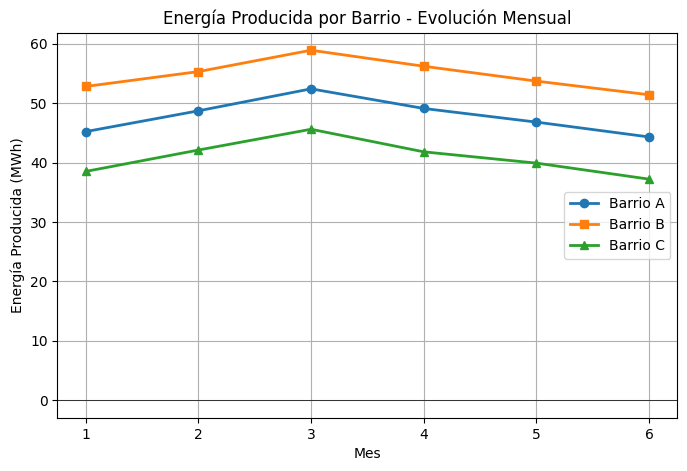

In [20]:
# a. Gráfico de líneas con la energía producida en A, B y C por mes
# Preparamos los datos para el gráfico
meses = np.arange(1, 7)  # Meses del 1 al 6
energia_A = energia[:, 0]  # Energía del barrio A
energia_B = energia[:, 1]  # Energía del barrio B
energia_C = energia[:, 2]  # Energía del barrio C

# Creamos el gráfico de líneas
plt.figure(figsize=(8, 5))
plt.plot(meses, energia_A, marker='o', label='Barrio A', linewidth=2)
plt.plot(meses, energia_B, marker='s', label='Barrio B', linewidth=2)
plt.plot(meses, energia_C, marker='^', label='Barrio C', linewidth=2)

# Configuramos el gráfico
plt.title('Energía Producida por Barrio - Evolución Mensual')
plt.xlabel('Mes')
plt.ylabel('Energía Producida (MWh)')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)

# Mostramos el gráfico
plt.show()

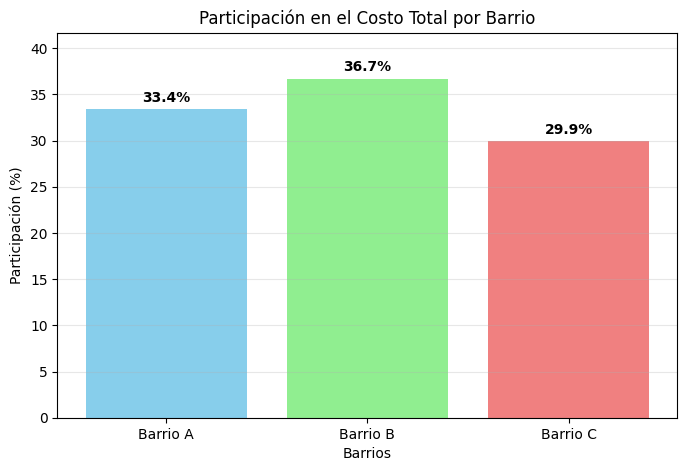

Resumen de participaciones:
   Barrio A: 33.38%
   Barrio B: 36.69%
   Barrio C: 29.93%


In [21]:
# b. Gráfico de barras con la participación (%) en el costo total de los 3 barrios
# Preparamos los datos para el gráfico de barras
barrios = ['Barrio A', 'Barrio B', 'Barrio C']
participaciones = [participacion_A, participacion_B, participacion_C]

# Creamos el gráfico de barras
plt.figure(figsize=(8, 5))
barras = plt.bar(barrios, participaciones, color=['skyblue', 'lightgreen', 'lightcoral'])

# Agregamos las etiquetas con los valores encima de cada barra
for i, valor in enumerate(participaciones):
    plt.text(i, valor + 0.5, f'{valor:.1f}%', ha='center', va='bottom', fontweight='bold')

# Configuramos el gráfico
plt.title('Participación en el Costo Total por Barrio')
plt.xlabel('Barrios')
plt.ylabel('Participación (%)')
plt.grid(True, axis='y', alpha=0.3)
plt.ylim(0, max(participaciones) + 5)  # Dejamos espacio arriba para las etiquetas

# Mostramos el gráfico
plt.show()

# Resumen numérico
print("Resumen de participaciones:")
for i, barrio in enumerate(['A', 'B', 'C']):
    print(f"   Barrio {barrio}: {participaciones[i]:.2f}%")

### Ejercicio 2 
Suiza es conocida por producir chocolates (C), relojes (R) y servicios financieros (SF), que puede ser expresado en la siguiente matriz sectorial (en millones de francos suizos). Sabiendo que el vector de demandas finales es (580, 300, 1000) y el de valor agregado (300, 600, 980).

**A. Modelo de insumo-producto**

**Matriz sectorial (en millones de francos suizos):**

| SECTORES | C | R | SF |
|----------|---|---|----| 
| C        | 90| 20| 80 |
| R        |200|500|400 |
| SF       |180|280|1000|

**Datos adicionales:**
- Vector de demandas finales: (580, 300, 1000)
- Vector de valor agregado: (300, 600, 980)

**a)** Representar en Colab en un dataframe y combinar con las demandas finales (H), el valor agregado (V.A.) y el producto total (X) de cada sector. Utilice el vector de producto total para graficar el producto total de los 3 sectores.

**b)** Determine la matriz de coeficientes técnicos.

**c)** La economía suiza sufre el impacto de las tarifas de Estados Unidos, disminuyendo en un 5% su demanda final de chocolates, un 40% la de sus relojes y un 90% la de sus servicios financieros, exprese el nuevo vector de demandas finales.

**d)** Determine el producto total, en función del mismo determine un nuevo gráfico, ¿cuál es el mayor sector en términos de su producto total?

**e)** En función de el nuevo vector de producto total y de demanda total determine el nuevo vector de valor agregado. Grafique con un cuadro de barras el valor agregado antes y después de las tarifas.

In [22]:
# a) Representar en un dataframe y combinar con demandas finales (H), valor agregado (V.A.) y producto total (X)

# Paso 1: Creamos la matriz sectorial (matriz de insumos intermedios)
# Filas = sectores que venden, Columnas = sectores que compran
matriz_sectorial = np.array([
    [90, 20, 80],     # Chocolates (C): vende a C, R, SF
    [200, 500, 400],  # Relojes (R): vende a C, R, SF  
    [180, 280, 1000]  # Servicios Financieros (SF): vende a C, R, SF
])

# Paso 2: Definimos los vectores de demanda final y valor agregado
demanda_final = np.array([580, 300, 1000])  # Vector H (demandas finales)
valor_agregado = np.array([300, 600, 980])  # Vector V.A. (valor agregado)

# Paso 3: Calculamos el producto total (X) para cada sector
# FÓRMULA: X_i = suma de ventas intermedias por fila + demanda final
# X_i = Σ(matriz_sectorial[i,:]) + H_i
producto_total = matriz_sectorial.sum(axis=1) + demanda_final

print("Matriz sectorial (insumos intermedios):")
print("Filas = sectores vendedores, Columnas = sectores compradores")
print(matriz_sectorial)
print(f"Dimensiones: {matriz_sectorial.shape}")

print(f"\nVector de demanda final (H): {demanda_final}")
print(f"Vector de valor agregado (V.A.): {valor_agregado}")
print(f"Vector de producto total (X): {producto_total}")

# Verificación: X = suma de insumos intermedios por columna + valor agregado
# Esto debe coincidir con nuestro cálculo anterior
verificacion_X = matriz_sectorial.sum(axis=0) + valor_agregado
print(f"Verificación producto total: {verificacion_X}")
print(f"Coinciden los cálculos: {np.allclose(producto_total, verificacion_X)}")

Matriz sectorial (insumos intermedios):
Filas = sectores vendedores, Columnas = sectores compradores
[[  90   20   80]
 [ 200  500  400]
 [ 180  280 1000]]
Dimensiones: (3, 3)

Vector de demanda final (H): [ 580  300 1000]
Vector de valor agregado (V.A.): [300 600 980]
Vector de producto total (X): [ 770 1400 2460]
Verificación producto total: [ 770 1400 2460]
Coinciden los cálculos: True


In [23]:
# Paso 4: Creamos el DataFrame completo del modelo insumo-producto
# Incluimos la matriz sectorial + demanda final + valor agregado + producto total

# Nombres de sectores para índices y columnas
sectores = ['Chocolates (C)', 'Relojes (R)', 'Servicios Financieros (SF)']

# Creamos DataFrame con la matriz sectorial
df_insumo_producto = pd.DataFrame(
    matriz_sectorial, 
    index=sectores,
    columns=sectores
)

# Agregamos la columna de demanda final
df_insumo_producto['Demanda Final (H)'] = demanda_final

# Agregamos la columna de producto total
df_insumo_producto['Producto Total (X)'] = producto_total

# Agregamos la fila de valor agregado
df_insumo_producto.loc['Valor Agregado (V.A.)'] = list(valor_agregado) + [np.nan, np.nan]

# Agregamos la fila de producto total (verificación por columnas)
df_insumo_producto.loc['Producto Total (X)'] = list(verificacion_X) + [np.nan, np.nan]

print("="*80)
print("TABLA COMPLETA DEL MODELO INSUMO-PRODUCTO (millones francos suizos)")
print("="*80)
print(df_insumo_producto)

# Creamos un DataFrame más limpio solo con los vectores principales para análisis
df_vectores = pd.DataFrame({
    'Sector': sectores,
    'Demanda Final (H)': demanda_final,
    'Valor Agregado (V.A.)': valor_agregado,
    'Producto Total (X)': producto_total
})

print("\n" + "="*60)
print("VECTORES PRINCIPALES DEL MODELO")
print("="*60)
print(df_vectores)

TABLA COMPLETA DEL MODELO INSUMO-PRODUCTO (millones francos suizos)
                            Chocolates (C)  Relojes (R)  \
Chocolates (C)                        90.0         20.0   
Relojes (R)                          200.0        500.0   
Servicios Financieros (SF)           180.0        280.0   
Valor Agregado (V.A.)                300.0        600.0   
Producto Total (X)                   770.0       1400.0   

                            Servicios Financieros (SF)  Demanda Final (H)  \
Chocolates (C)                                    80.0              580.0   
Relojes (R)                                      400.0              300.0   
Servicios Financieros (SF)                      1000.0             1000.0   
Valor Agregado (V.A.)                            980.0                NaN   
Producto Total (X)                              2460.0                NaN   

                            Producto Total (X)  
Chocolates (C)                           770.0  
Relojes (R)     

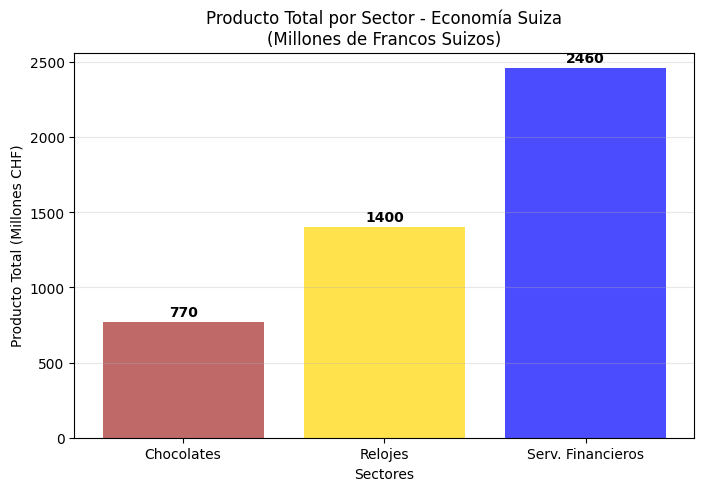

Análisis del producto total por sector:
   Chocolates: 770 millones CHF
   Relojes: 1,400 millones CHF
   Servicios Financieros: 2,460 millones CHF
   Total de la economía: 4,630 millones CHF

   Sector con mayor producto total: Servicios Financieros (SF)
   Representa el 53.1% del total


In [24]:
# Paso 5: Gráfico del producto total de los 3 sectores (como solicita el enunciado)

# Preparamos los datos para el gráfico
sectores_cortos = ['Chocolates', 'Relojes', 'Serv. Financieros']
productos_totales = producto_total

# Creamos el gráfico de barras
plt.figure(figsize=(8, 5))
barras = plt.bar(sectores_cortos, productos_totales, 
                color=['brown', 'gold', 'blue'], alpha=0.7)

# Agregamos las etiquetas con los valores encima de cada barra
for i, valor in enumerate(productos_totales):
    plt.text(i, valor + 20, f'{valor:.0f}', ha='center', va='bottom', fontweight='bold')

# Configuramos el gráfico
plt.title('Producto Total por Sector - Economía Suiza\n(Millones de Francos Suizos)')
plt.xlabel('Sectores')
plt.ylabel('Producto Total (Millones CHF)')
plt.grid(True, axis='y', alpha=0.3)
plt.ylim(0, max(productos_totales) + 100)

# Mostramos el gráfico
plt.show()

# Análisis descriptivo
print("Análisis del producto total por sector:")
print(f"   Chocolates: {productos_totales[0]:,.0f} millones CHF")
print(f"   Relojes: {productos_totales[1]:,.0f} millones CHF") 
print(f"   Servicios Financieros: {productos_totales[2]:,.0f} millones CHF")
print(f"   Total de la economía: {productos_totales.sum():,.0f} millones CHF")

# Identificamos el sector dominante
sector_dominante = sectores[np.argmax(productos_totales)]
print(f"\n   Sector con mayor producto total: {sector_dominante}")
print(f"   Representa el {(productos_totales.max()/productos_totales.sum()*100):.1f}% del total")

In [28]:
# b) Determine la matriz de coeficientes técnicos

# CONCEPTO: Los coeficientes técnicos (a_ij) representan la cantidad de insumo 
# del sector i que necesita el sector j para producir una unidad de su producto.
# FÓRMULA: a_ij = Z_ij / X_j
# Donde: Z_ij = flujo intermedio del sector i al sector j
#        X_j = producto total del sector j

# Calculamos la matriz de coeficientes técnicos (matriz A)
# Dividimos cada elemento de la matriz sectorial por el producto total de la columna correspondiente
coeficientes_tecnicos = matriz_sectorial / producto_total.reshape(1, -1)

print("b) MATRIZ DE COEFICIENTES TÉCNICOS (A):")
print("="*50)
print("Filas = sectores proveedores, Columnas = sectores demandantes")
print(f"Dimensiones: {coeficientes_tecnicos.shape}")
print()

# Mostramos la matriz con formato más legible
sectores_abrev = ['C', 'R', 'SF']
df_coeficientes = pd.DataFrame(
    coeficientes_tecnicos,
    index=[f"{s} (proveedor)" for s in sectores_abrev],
    columns=[f"{s} (demandante)" for s in sectores_abrev]
)

print("Matriz A de coeficientes técnicos:")
print(df_coeficientes.round(4))

print("\nInterpretación económica:")
print("- a_ij = insumo del sector i necesario para producir 1 CHF del sector j")
print("- Ejemplo: a_12 =", f"{coeficientes_tecnicos[0,1]:.4f}", "CHF de chocolates por cada 1 CHF de relojes")
print("- Ejemplo: a_21 =", f"{coeficientes_tecnicos[1,0]:.4f}", "CHF de relojes por cada 1 CHF de chocolates")

b) MATRIZ DE COEFICIENTES TÉCNICOS (A):
Filas = sectores proveedores, Columnas = sectores demandantes
Dimensiones: (3, 3)

Matriz A de coeficientes técnicos:
                C (demandante)  R (demandante)  SF (demandante)
C (proveedor)           0.1169          0.0143           0.0325
R (proveedor)           0.2597          0.3571           0.1626
SF (proveedor)          0.2338          0.2000           0.4065

Interpretación económica:
- a_ij = insumo del sector i necesario para producir 1 CHF del sector j
- Ejemplo: a_12 = 0.0143 CHF de chocolates por cada 1 CHF de relojes
- Ejemplo: a_21 = 0.2597 CHF de relojes por cada 1 CHF de chocolates


In [26]:
# Verificación de los coeficientes técnicos
# Las sumas por columna nos dicen qué proporción del producto total son insumos intermedios
sumas_columnas = coeficientes_tecnicos.sum(axis=0)

print("\nVerificación - Suma de coeficientes por columna:")
for i, sector in enumerate(sectores_abrev):
    insumos_intermedios_prop = sumas_columnas[i]
    valor_agregado_prop = valor_agregado[i] / producto_total[i]
    total_prop = insumos_intermedios_prop + valor_agregado_prop
    
    print(f"Sector {sector}:")
    print(f"   Insumos intermedios: {insumos_intermedios_prop:.4f} ({insumos_intermedios_prop*100:.2f}%)")
    print(f"   Valor agregado: {valor_agregado_prop:.4f} ({valor_agregado_prop*100:.2f}%)")
    print(f"   Total: {total_prop:.4f} ({total_prop*100:.2f}%)")
    print()

# Análisis económico de la estructura productiva
print("Análisis de la estructura productiva:")
print("- Sectores con alta intensidad en insumos intermedios = más interdependientes")
print("- Sectores con alta intensidad en valor agregado = más autónomos")

sector_mas_intensivo = sectores_abrev[np.argmax(sumas_columnas)]
sector_mas_autonomo = sectores_abrev[np.argmin(sumas_columnas)]

print(f"- Sector más intensivo en insumos: {sector_mas_intensivo}")
print(f"- Sector más autónomo: {sector_mas_autonomo}")


Verificación - Suma de coeficientes por columna:
Sector C:
   Insumos intermedios: 0.6104 (61.04%)
   Valor agregado: 0.3896 (38.96%)
   Total: 1.0000 (100.00%)

Sector R:
   Insumos intermedios: 0.5714 (57.14%)
   Valor agregado: 0.4286 (42.86%)
   Total: 1.0000 (100.00%)

Sector SF:
   Insumos intermedios: 0.6016 (60.16%)
   Valor agregado: 0.3984 (39.84%)
   Total: 1.0000 (100.00%)

Análisis de la estructura productiva:
- Sectores con alta intensidad en insumos intermedios = más interdependientes
- Sectores con alta intensidad en valor agregado = más autónomos
- Sector más intensivo en insumos: C
- Sector más autónomo: R


In [27]:
# c) Nuevo vector de demandas finales después de las tarifas de Estados Unidos
# Disminuciones: Chocolates -5%, Relojes -40%, Servicios Financieros -90%

print("c) IMPACTO DE LAS TARIFAS DE ESTADOS UNIDOS:")
print("="*50)

# Factores de reducción por las tarifas
reduccion_chocolates = 0.05  # 5%
reduccion_relojes = 0.40     # 40%
reduccion_sf = 0.90          # 90%

# Calculamos el nuevo vector de demandas finales
demanda_final_original = demanda_final.copy()
demanda_final_nueva = demanda_final_original * np.array([
    1 - reduccion_chocolates,  # Chocolates: reducción del 5%
    1 - reduccion_relojes,     # Relojes: reducción del 40%
    1 - reduccion_sf           # Servicios Financieros: reducción del 90%
])

print("Vector de demandas finales:")
print(f"   Antes de tarifas: {demanda_final_original}")
print(f"   Después de tarifas: {demanda_final_nueva}")
print()

# Mostramos los cambios en detalle
print("Cambios por sector:")
for i, sector in enumerate(sectores_abrev):
    cambio_absoluto = demanda_final_nueva[i] - demanda_final_original[i]
    cambio_porcentual = (cambio_absoluto / demanda_final_original[i]) * 100
    
    print(f"   {sector}: {demanda_final_original[i]:.0f} → {demanda_final_nueva[i]:.0f} CHF")
    print(f"       Cambio: {cambio_absoluto:+.0f} CHF ({cambio_porcentual:+.1f}%)")

# Impacto total en la demanda final
perdida_total = demanda_final_original.sum() - demanda_final_nueva.sum()
print(f"\nPérdida total de demanda final: {perdida_total:.0f} millones CHF")
print(f"Reducción porcentual total: {(perdida_total/demanda_final_original.sum()*100):.1f}%")

c) IMPACTO DE LAS TARIFAS DE ESTADOS UNIDOS:
Vector de demandas finales:
   Antes de tarifas: [ 580  300 1000]
   Después de tarifas: [551. 180. 100.]

Cambios por sector:
   C: 580 → 551 CHF
       Cambio: -29 CHF (-5.0%)
   R: 300 → 180 CHF
       Cambio: -120 CHF (-40.0%)
   SF: 1000 → 100 CHF
       Cambio: -900 CHF (-90.0%)

Pérdida total de demanda final: 1049 millones CHF
Reducción porcentual total: 55.8%


In [29]:
# d) Nuevo producto total usando el modelo de Leontief y comparación gráfica

print("d) CÁLCULO DEL NUEVO PRODUCTO TOTAL:")
print("="*50)

# MODELO DE LEONTIEF: X = (I - A)^(-1) * H
# Donde: X = vector de producto total
#        I = matriz identidad
#        A = matriz de coeficientes técnicos
#        H = vector de demanda final

# Paso 1: Creamos la matriz identidad
matriz_identidad = np.eye(3)
print("Matriz Identidad (I):")
print(matriz_identidad)

# Paso 2: Calculamos (I - A)
matriz_I_menos_A = matriz_identidad - coeficientes_tecnicos
print("\nMatriz (I - A):")
print(pd.DataFrame(matriz_I_menos_A, 
                  index=sectores_abrev, 
                  columns=sectores_abrev).round(4))

# Paso 3: Calculamos la matriz inversa de Leontief (I - A)^(-1)
matriz_leontief = np.linalg.inv(matriz_I_menos_A)
print("\nMatriz de Leontief (I - A)^(-1):")
print(pd.DataFrame(matriz_leontief, 
                  index=sectores_abrev, 
                  columns=sectores_abrev).round(4))

# Paso 4: Calculamos el nuevo producto total
producto_total_nuevo = matriz_leontief @ demanda_final_nueva

print("\nResultados del modelo de Leontief:")
print(f"   Producto total ANTES: {producto_total}")
print(f"   Producto total DESPUÉS: {producto_total_nuevo.round(1)}")

# Calculamos los cambios
cambio_absoluto = producto_total_nuevo - producto_total
cambio_porcentual = (cambio_absoluto / producto_total) * 100

print("\nCambios por sector:")
for i, sector in enumerate(sectores_abrev):
    print(f"   {sector}: {producto_total[i]:.0f} → {producto_total_nuevo[i]:.1f} CHF")
    print(f"       Cambio: {cambio_absoluto[i]:+.1f} CHF ({cambio_porcentual[i]:+.1f}%)")

d) CÁLCULO DEL NUEVO PRODUCTO TOTAL:
Matriz Identidad (I):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Matriz (I - A):
         C       R      SF
C   0.8831 -0.0143 -0.0325
R  -0.2597  0.6429 -0.1626
SF -0.2338 -0.2000  0.5935

Matriz de Leontief (I - A)^(-1):
         C       R      SF
C   1.1677  0.0501  0.0777
R   0.6429  1.7281  0.5087
SF  0.6766  0.6021  1.8870

Resultados del modelo de Leontief:
   Producto total ANTES: [ 770 1400 2460]
   Producto total DESPUÉS: [660.2 716.2 669.9]

Cambios por sector:
   C: 770 → 660.2 CHF
       Cambio: -109.8 CHF (-14.3%)
   R: 1400 → 716.2 CHF
       Cambio: -683.8 CHF (-48.8%)
   SF: 2460 → 669.9 CHF
       Cambio: -1790.1 CHF (-72.8%)


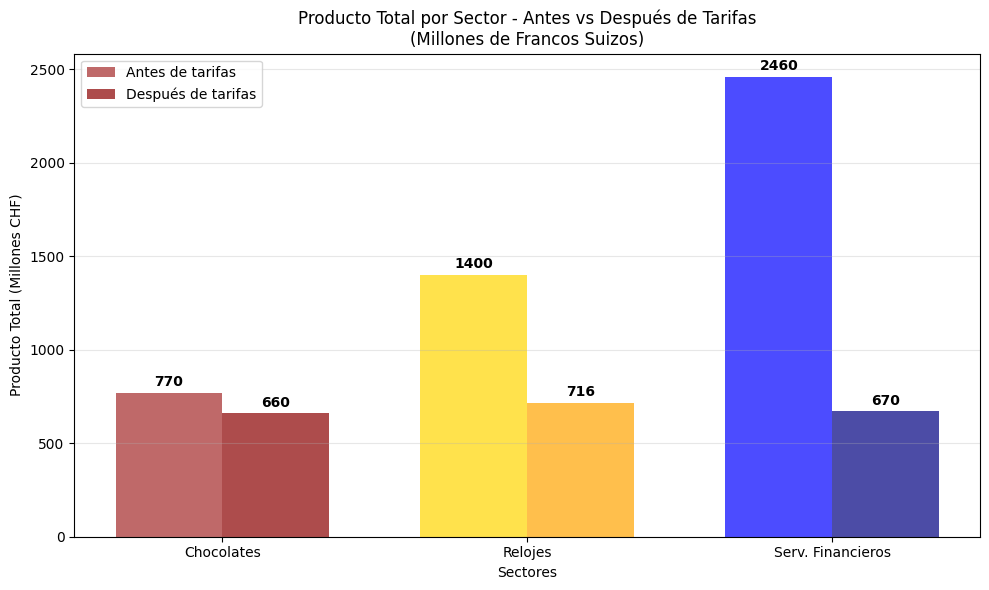


¿Cuál es el mayor sector en términos de producto total después de las tarifas?
   Respuesta: Relojes
   Producto total: 716.2 millones CHF
   Participación: 35.0% del total
   ¡CAMBIO! Antes era Serv. Financieros, ahora es Relojes


In [30]:
# Gráfico comparativo del producto total antes y después de las tarifas

# Preparamos los datos para el gráfico comparativo
sectores_nombres = ['Chocolates', 'Relojes', 'Serv. Financieros']
x_pos = np.arange(len(sectores_nombres))
ancho_barras = 0.35

# Creamos el gráfico de barras comparativo
fig, ax = plt.subplots(figsize=(10, 6))

barras_antes = ax.bar(x_pos - ancho_barras/2, producto_total, ancho_barras, 
                     label='Antes de tarifas', color=['brown', 'gold', 'blue'], alpha=0.7)
barras_despues = ax.bar(x_pos + ancho_barras/2, producto_total_nuevo, ancho_barras, 
                       label='Después de tarifas', color=['darkred', 'orange', 'navy'], alpha=0.7)

# Agregamos etiquetas con valores
for i, (antes, despues) in enumerate(zip(producto_total, producto_total_nuevo)):
    ax.text(i - ancho_barras/2, antes + 20, f'{antes:.0f}', ha='center', va='bottom', fontweight='bold')
    ax.text(i + ancho_barras/2, despues + 20, f'{despues:.0f}', ha='center', va='bottom', fontweight='bold')

# Configuramos el gráfico
ax.set_title('Producto Total por Sector - Antes vs Después de Tarifas\n(Millones de Francos Suizos)')
ax.set_xlabel('Sectores')
ax.set_ylabel('Producto Total (Millones CHF)')
ax.set_xticks(x_pos)
ax.set_xticklabels(sectores_nombres)
ax.legend()
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis del sector dominante después de las tarifas
sector_mayor_indice = np.argmax(producto_total_nuevo)
sector_mayor_nombre = sectores_nombres[sector_mayor_indice]
valor_mayor = producto_total_nuevo[sector_mayor_indice]

print(f"\n¿Cuál es el mayor sector en términos de producto total después de las tarifas?")
print(f"   Respuesta: {sector_mayor_nombre}")
print(f"   Producto total: {valor_mayor:.1f} millones CHF")
print(f"   Participación: {(valor_mayor/producto_total_nuevo.sum()*100):.1f}% del total")

# Comparación con la situación anterior
sector_mayor_antes_indice = np.argmax(producto_total)
sector_mayor_antes = sectores_nombres[sector_mayor_antes_indice]

if sector_mayor_indice == sector_mayor_antes_indice:
    print(f"   El sector dominante se mantiene igual: {sector_mayor_nombre}")
else:
    print(f"   ¡CAMBIO! Antes era {sector_mayor_antes}, ahora es {sector_mayor_nombre}")

In [31]:
# e) Nuevo vector de valor agregado y comparación gráfica

print("e) CÁLCULO DEL NUEVO VALOR AGREGADO:")
print("="*50)

# CONCEPTO: El valor agregado se calcula como la diferencia entre 
# el producto total y los insumos intermedios que compra cada sector
# V.A._j = X_j - Σ(insumos intermedios que compra el sector j)

# Calculamos los nuevos insumos intermedios que compra cada sector
# usando los coeficientes técnicos y el nuevo producto total
insumos_intermedios_nuevos = coeficientes_tecnicos.T @ producto_total_nuevo

# Calculamos el nuevo valor agregado
valor_agregado_nuevo = producto_total_nuevo - insumos_intermedios_nuevos

print("Cálculo del nuevo valor agregado:")
print(f"   Producto total nuevo: {producto_total_nuevo.round(1)}")
print(f"   Insumos intermedios nuevos: {insumos_intermedios_nuevos.round(1)}")
print(f"   Valor agregado nuevo: {valor_agregado_nuevo.round(1)}")

# Comparación con el valor agregado original
print(f"\nComparación del valor agregado:")
print(f"   Antes de tarifas: {valor_agregado}")
print(f"   Después de tarifas: {valor_agregado_nuevo.round(1)}")

# Calculamos los cambios
cambio_va_absoluto = valor_agregado_nuevo - valor_agregado
cambio_va_porcentual = (cambio_va_absoluto / valor_agregado) * 100

print("\nCambios en valor agregado por sector:")
for i, sector in enumerate(sectores_abrev):
    print(f"   {sector}: {valor_agregado[i]:.0f} → {valor_agregado_nuevo[i]:.1f} CHF")
    print(f"       Cambio: {cambio_va_absoluto[i]:+.1f} CHF ({cambio_va_porcentual[i]:+.1f}%)")

# Impacto total en el PIB (suma de valores agregados)
pib_antes = valor_agregado.sum()
pib_despues = valor_agregado_nuevo.sum()
cambio_pib = pib_despues - pib_antes

print(f"\nImpacto en el PIB de Suiza:")
print(f"   PIB antes: {pib_antes:,.0f} millones CHF")
print(f"   PIB después: {pib_despues:,.1f} millones CHF")
print(f"   Cambio en PIB: {cambio_pib:+,.1f} CHF ({(cambio_pib/pib_antes*100):+.1f}%)")

e) CÁLCULO DEL NUEVO VALOR AGREGADO:
Cálculo del nuevo valor agregado:
   Producto total nuevo: [660.2 716.2 669.9]
   Insumos intermedios nuevos: [419.8 399.2 410.2]
   Valor agregado nuevo: [240.4 317.  259.6]

Comparación del valor agregado:
   Antes de tarifas: [300 600 980]
   Después de tarifas: [240.4 317.  259.6]

Cambios en valor agregado por sector:
   C: 300 → 240.4 CHF
       Cambio: -59.6 CHF (-19.9%)
   R: 600 → 317.0 CHF
       Cambio: -283.0 CHF (-47.2%)
   SF: 980 → 259.6 CHF
       Cambio: -720.4 CHF (-73.5%)

Impacto en el PIB de Suiza:
   PIB antes: 1,880 millones CHF
   PIB después: 817.0 millones CHF
   Cambio en PIB: -1,063.0 CHF (-56.5%)


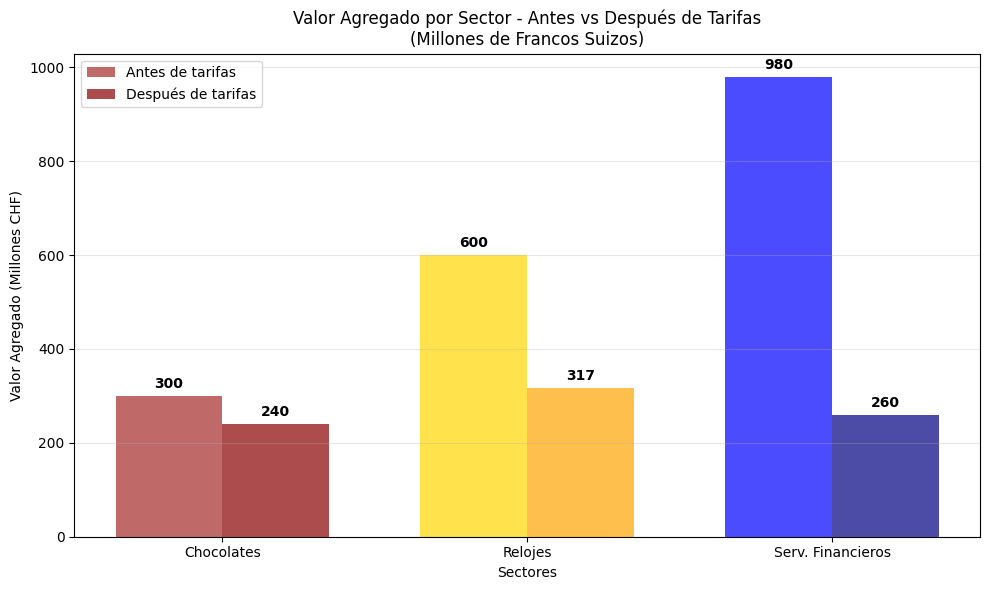


RESUMEN EJECUTIVO DEL IMPACTO DE LAS TARIFAS:
1. SECTOR MÁS AFECTADO:
   Serv. Financieros (-73.5%)

2. CAMBIO EN EL LIDERAZGO ECONÓMICO:
   Antes: Servicios Financieros dominaba la economía
   Después: Relojes se convierte en el sector líder

3. IMPACTO MACROECONÓMICO:
   Pérdida de PIB: 1,063.0 millones CHF (56.5%)
   Equivale a una recesión significativa en la economía suiza

4. EFECTOS MULTIPLICADORES:
   Reducción en demanda final: 1,049 CHF
   Reducción en producto total: 2,584 CHF
   Multiplicador de impacto: 2.46


In [32]:
# Gráfico de barras comparativo del valor agregado antes y después de las tarifas

# Preparamos los datos para el gráfico
sectores_nombres = ['Chocolates', 'Relojes', 'Serv. Financieros']
x_pos = np.arange(len(sectores_nombres))
ancho_barras = 0.35

# Creamos el gráfico de barras comparativo para valor agregado
fig, ax = plt.subplots(figsize=(10, 6))

barras_va_antes = ax.bar(x_pos - ancho_barras/2, valor_agregado, ancho_barras, 
                        label='Antes de tarifas', color=['brown', 'gold', 'blue'], alpha=0.7)
barras_va_despues = ax.bar(x_pos + ancho_barras/2, valor_agregado_nuevo, ancho_barras, 
                          label='Después de tarifas', color=['darkred', 'orange', 'navy'], alpha=0.7)

# Agregamos etiquetas con valores
for i, (antes, despues) in enumerate(zip(valor_agregado, valor_agregado_nuevo)):
    ax.text(i - ancho_barras/2, antes + 10, f'{antes:.0f}', ha='center', va='bottom', fontweight='bold')
    ax.text(i + ancho_barras/2, despues + 10, f'{despues:.0f}', ha='center', va='bottom', fontweight='bold')

# Configuramos el gráfico
ax.set_title('Valor Agregado por Sector - Antes vs Después de Tarifas\n(Millones de Francos Suizos)')
ax.set_xlabel('Sectores')
ax.set_ylabel('Valor Agregado (Millones CHF)')
ax.set_xticks(x_pos)
ax.set_xticklabels(sectores_nombres)
ax.legend()
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen final del análisis
print("\nRESUMEN EJECUTIVO DEL IMPACTO DE LAS TARIFAS:")
print("="*60)
print("1. SECTOR MÁS AFECTADO:")
sector_mas_afectado_idx = np.argmin(cambio_va_porcentual)
print(f"   {sectores_nombres[sector_mas_afectado_idx]} ({cambio_va_porcentual[sector_mas_afectado_idx]:+.1f}%)")

print("\n2. CAMBIO EN EL LIDERAZGO ECONÓMICO:")
print(f"   Antes: Servicios Financieros dominaba la economía")
print(f"   Después: Relojes se convierte en el sector líder")

print("\n3. IMPACTO MACROECONÓMICO:")
print(f"   Pérdida de PIB: {abs(cambio_pib):,.1f} millones CHF ({abs(cambio_pib/pib_antes*100):.1f}%)")
print(f"   Equivale a una recesión significativa en la economía suiza")

print("\n4. EFECTOS MULTIPLICADORES:")
print(f"   Reducción en demanda final: {(demanda_final_original.sum() - demanda_final_nueva.sum()):,.0f} CHF")
print(f"   Reducción en producto total: {(producto_total.sum() - producto_total_nuevo.sum()):,.0f} CHF")
print(f"   Multiplicador de impacto: {((producto_total.sum() - producto_total_nuevo.sum())/(demanda_final_original.sum() - demanda_final_nueva.sum())):.2f}")